In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_predictions.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Filling null values with mode and mean method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
##filling null values for categorical data type with mode method

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

##filling null values for numerical data type with mean method

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis
## Now we create distribution plots for numerical variables to check if there is any skewness  ## within any of the  numerical variables as well as a count plot for loan status.  

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

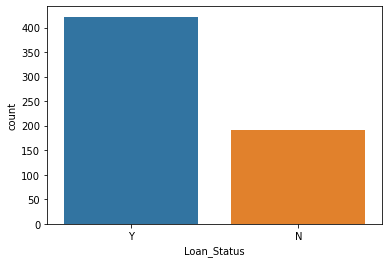

In [8]:
sns.countplot(df['Loan_Status'])

In [9]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Creating new variable as Total income

In [10]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']


In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


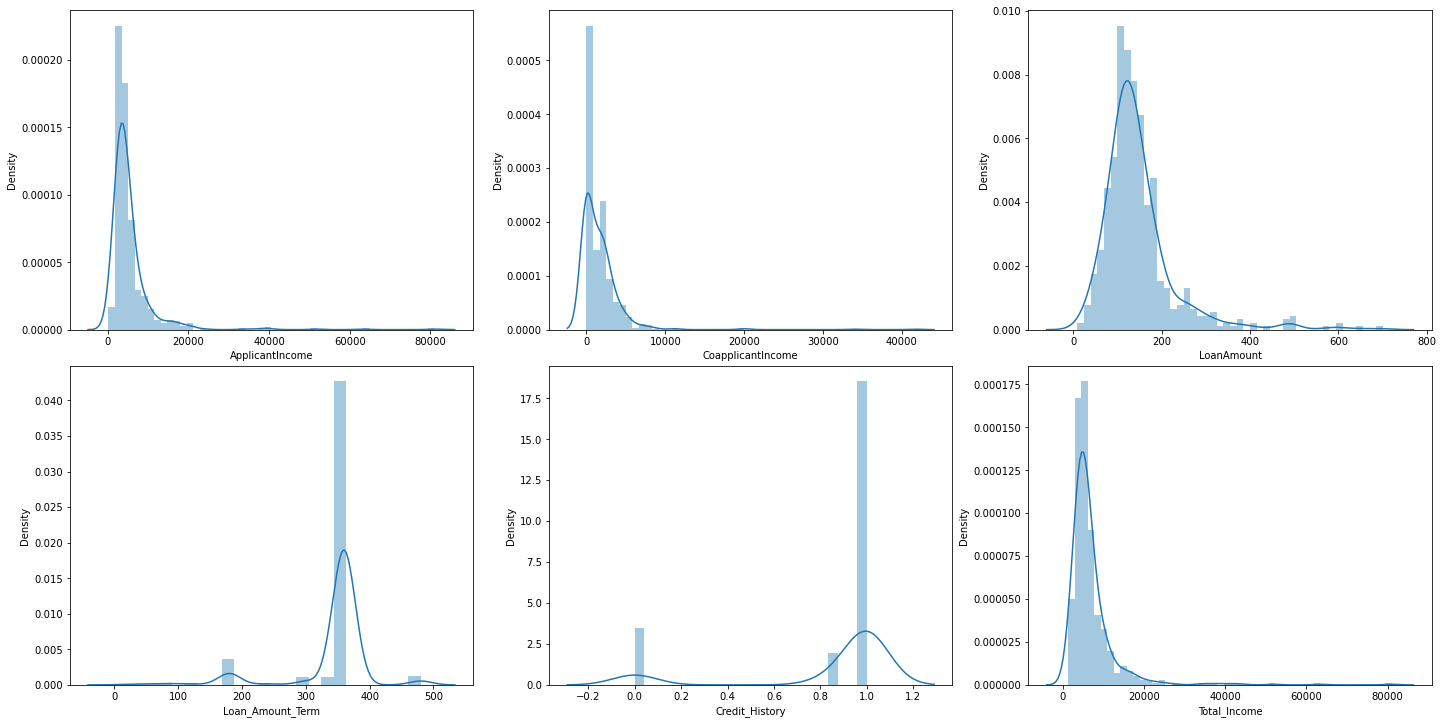

In [12]:
fig, ax=plt.subplots(ncols=3, nrows=2, figsize=(20,10)) 
index=0
ax=ax.flatten()
for col, value in df.items():
    if col !='Loan_ID' and col !='Gender' and col !='Married' and col !='Dependents' and col !='Education' and col !='Self_Employed' and col !='Property_Area' and col !='Loan_Status':    
        sns.distplot(value, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=0.5)


# Applicant income, Coaplicant income, Total income and Loan amount are right skewed, they could be fixed by Log Transformation for more balanced distribution

In [13]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

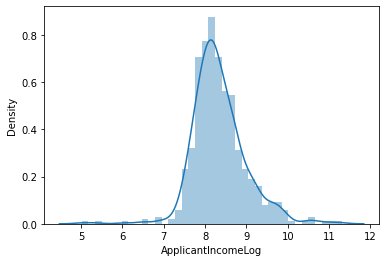

In [15]:
sns.distplot(df['ApplicantIncomeLog'])

In [16]:
df['Total_IncomeLog']=np.log(df['Total_Income'])

<AxesSubplot:xlabel='Total_IncomeLog', ylabel='Density'>

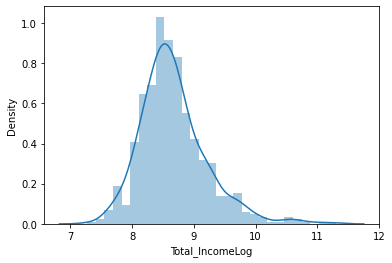

In [17]:
sns.distplot(df['Total_IncomeLog'])

In [19]:
df['LoanAmountLog']=np.log(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

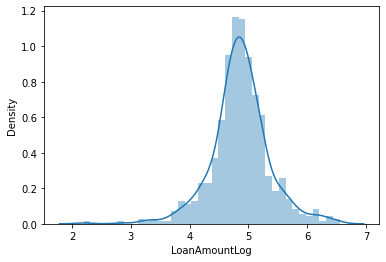

In [20]:
sns.distplot(df['LoanAmountLog'])

# Correlation Matrix

<AxesSubplot:>

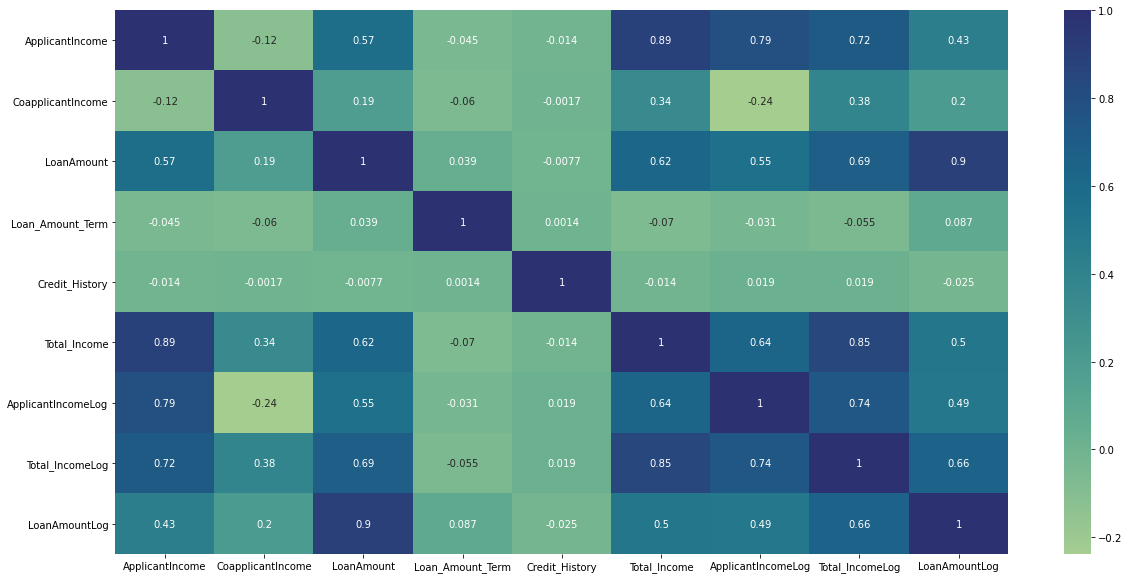

In [29]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='crest')

In [32]:
cols=['ApplicantIncome','CoapplicantIncome','Total_Income']
df=df.drop(columns=cols, axis=1)

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Total_IncomeLog,LoanAmountLog
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,8.674026,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,8.430109,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,8.006368,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,7.856707,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,8.699515,8.699515,4.948760


# Label encoding for categorical variables

In [47]:
from sklearn.preprocessing import LabelEncoder
lbnc=LabelEncoder()
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for col in cols:
    df[col]=lbnc.fit_transform(df[col])

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Total_IncomeLog,LoanAmountLog
0,LP001002,1,0,0,0,0,146.412162,360.0,1.0,2,1,8.674026,8.674026,4.986426
1,LP001003,1,1,1,0,0,128.000000,360.0,1.0,0,0,8.430109,8.714568,4.852030
2,LP001005,1,1,0,0,1,66.000000,360.0,1.0,2,1,8.006368,8.006368,4.189655
3,LP001006,1,1,0,1,0,120.000000,360.0,1.0,2,1,7.856707,8.505323,4.787492
4,LP001008,1,0,0,0,0,141.000000,360.0,1.0,2,1,8.699515,8.699515,4.948760


# Train - Test split

In [65]:
X=df.drop(columns=['Loan_Status','Loan_ID'])
y=df['Loan_Status']

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

# Model Training

In [67]:
from sklearn.model_selection import cross_val_score
def classify (model,x,y):
    x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy rate:", model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("Cross Val. is:", np.mean(score)*100)

# Choosing Training Models

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X,y)

Accuracy rate: 77.27272727272727
Cross Val. is: 80.78368652538984


In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X,y)

Accuracy rate: 72.72727272727273
Cross Val. is: 71.66600026656003


In [71]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model, X,y)

Accuracy rate: 77.92207792207793
Cross Val. is: 77.85019325603093


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model, X,y)

Accuracy rate: 75.32467532467533
Cross Val. is: 76.55071304811408


# Hyperparameter Tuning

In [80]:
model=RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X,y)

Accuracy rate: 74.67532467532467
Cross Val. is: 79.15233906437426


# Confusion Matrix

In [83]:
model=RandomForestClassifier()
model.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[24, 30],
       [ 3, 97]])

<AxesSubplot:>

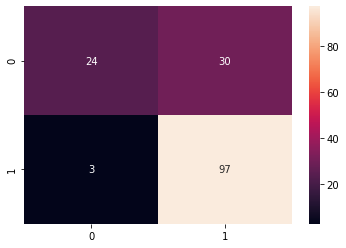

In [84]:
sns.heatmap(cm, annot=True)

In [86]:
#Type 1 error (false positive):30
#Type 2 error (false negative):3
#AR= (121/154)*100 ≈  %78
#ER= (33/154)*100 ≈ %22